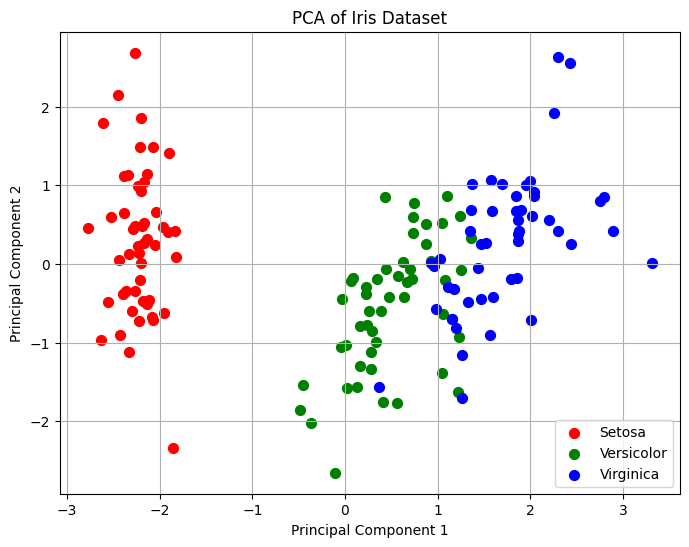

In [ ]:
# PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

plt.figure(figsize=(8, 6))
targets = ['Setosa', 'Versicolor', 'Virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = df_pca['Target'] == targets.index(target)
    plt.scatter(df_pca.loc[indices, 'PC1'], df_pca.loc[indices, 'PC2'], c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


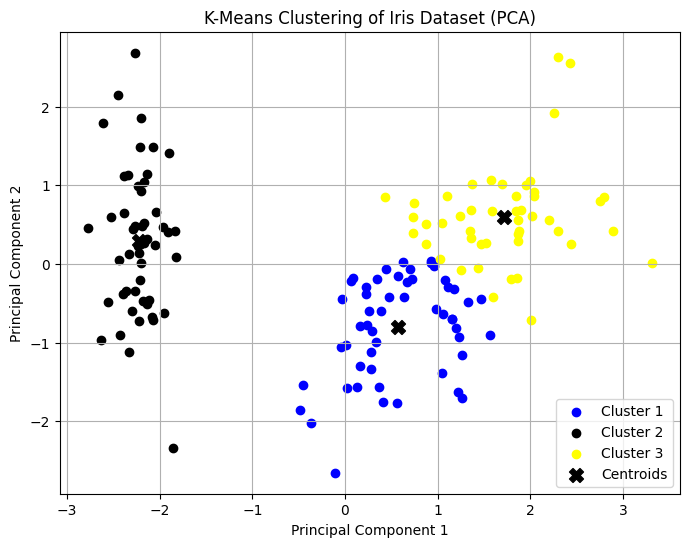

In [ ]:
# K-MEANS ALGORITHM

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
colors = ['blue', 'black', 'yellow']
for i in range(3):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i + 1}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='X', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Iris Dataset (PCA)')
plt.legend()
plt.grid(True)
plt.show()

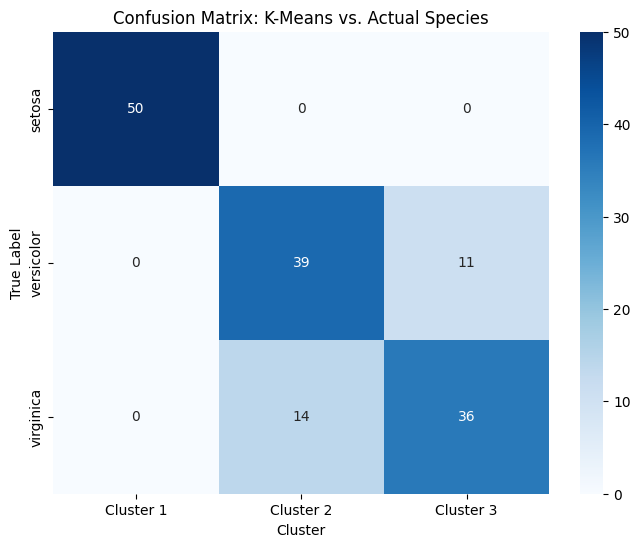

In [ ]:
# CONFUSION MATRIX FOR K-MEANS
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Map cluster labels to species labels based on majority vote
cluster_to_species = {}
for i in range(3):
    majority_species = np.argmax(np.bincount(y[cluster_labels == i]))
    cluster_to_species[i] = majority_species
mapped_cluster_labels = [cluster_to_species[label] for label in cluster_labels]

conf_matrix = confusion_matrix(y, mapped_cluster_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=["Cluster 1", "Cluster 2", "Cluster 3"], yticklabels=iris.target_names)
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.title('Confusion Matrix: K-Means vs. Actual Species')
plt.show()

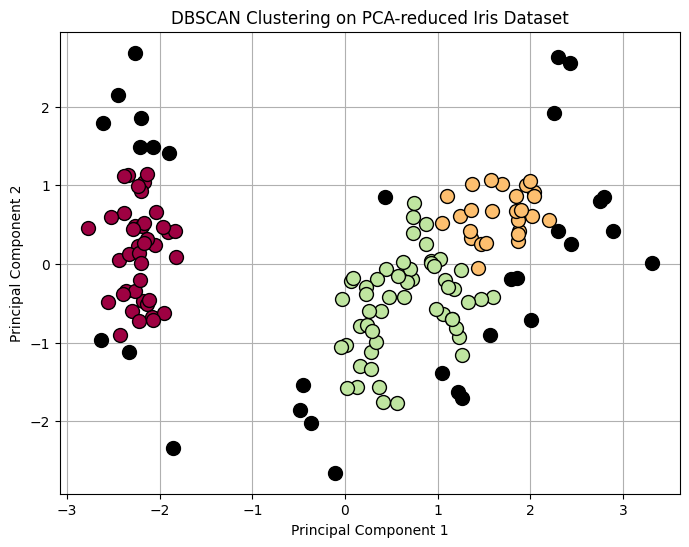

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
# Adjust eps and min_samples to achieve 3 clusters
dbscan = DBSCAN(eps=0.32, min_samples=5)
dbscan.fit(X_pca)
labels = dbscan.labels_

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

plt.title('DBSCAN Clustering on PCA-reduced Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

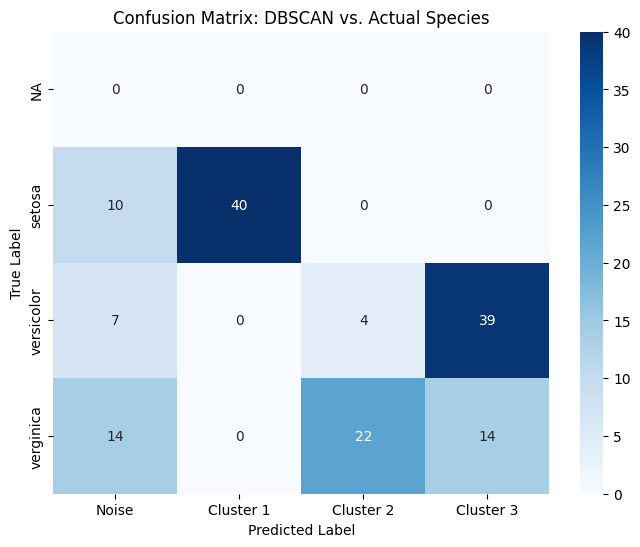

In [ ]:
# CONFUSION MATRIX FOR DBSCAN

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(iris.target, labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Noise', 'Cluster 1', 'Cluster 2', 'Cluster 3'], yticklabels= ["NA", "setosa", "versicolor", "verginica"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: DBSCAN vs. Actual Species')
plt.show()

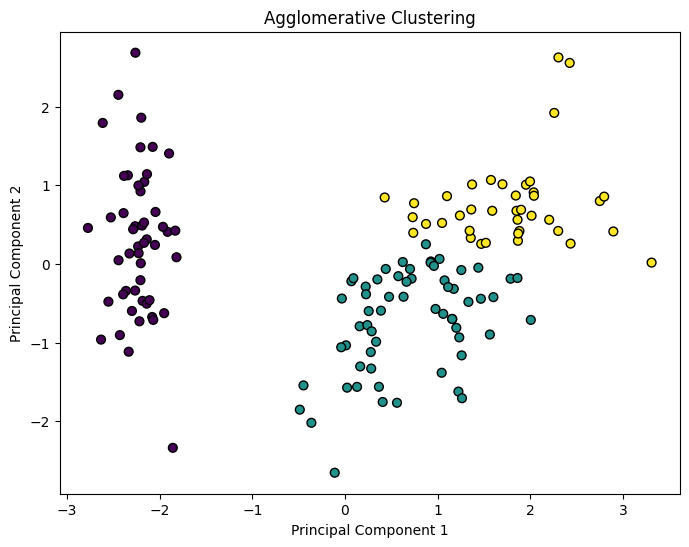

In [ ]:
# AGGLOMERATIVE CLUSTERING
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_pca)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

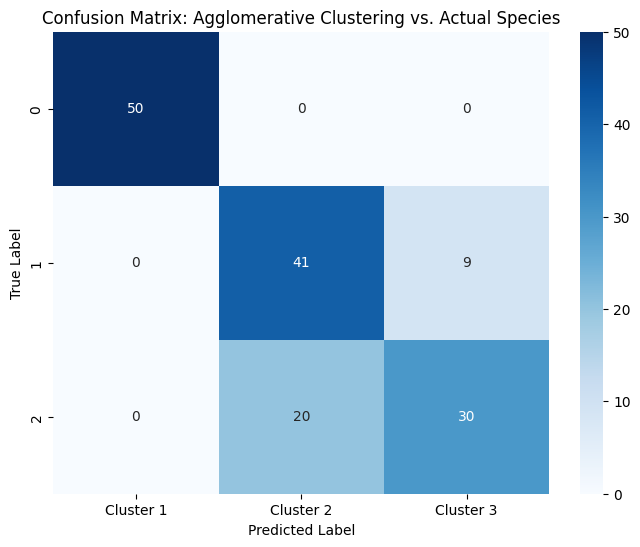

In [ ]:
# CONFUSION MATRIX FOR AGGLOMERATIVE CLUSTERING

agg_cm = confusion_matrix(iris.target, agg_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(agg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Agglomerative Clustering vs. Actual Species')
plt.show()

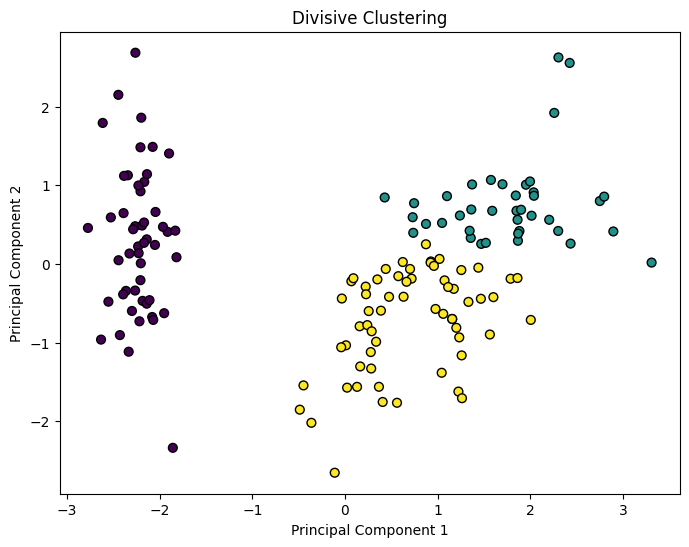

In [ ]:
# DIVISIVE CLUSTERING
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X_pca, method='ward')
max_d = 8
div_labels = fcluster(Z, max_d, criterion='distance')
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=div_labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Divisive Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

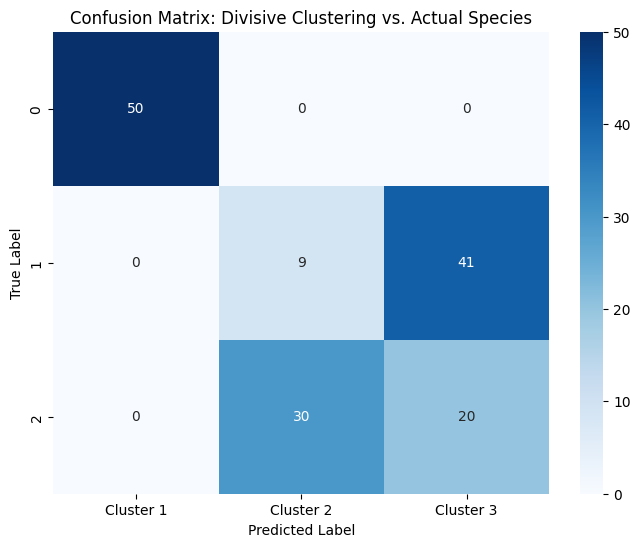

In [ ]:
# CONFUSION MATRIX FOR DIVISIVE CLUSTERING

div_labels_filtered = div_labels[div_labels != -1]
div_labels_mapped = div_labels_filtered - 1
div_cm = confusion_matrix(iris.target, div_labels_mapped)
plt.figure(figsize=(8, 6))
sns.heatmap(div_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Divisive Clustering vs. Actual Species')
plt.show()